# Pre-tutorial for the Python Workshop on Image Processing and Analysis

## 1. Numerical nature of images and manipulating them in Python

In this section we learn the numerical nature of digital images and some of the modules that can be used to manipulate them.

### 1.1. Numerical and array nature of images

A digital image we display on a computer screen is made up of pixels. Width and height of the image are defined by the number of pixels in x and y directions. Each pixel has brightness, or intensity (or more strictly, amplitude) somewhere between black and white, which is represented as a number. Within an image file saved in a computer hard disk, the intensity value of each pixel is written and that value is converted to the grayness of that pixel on monitor screen. We usually do not see these values, or numbers, in the image displayed on monitor, but we could access these numbers in the image file by converting the image file to a text file.

Before we can convert the image file into a text file, and then back into an image file, we need to import a few modules:

#### Import packages and modules

(Note: If you are not familiar with modules and functions in Python, is a problem for now, as you can just accept that modules are 'imported'. However, eventually, you will need to undertand what that means and if you want to familiarise yourself with it, we refer you to the accompaying tutorial on functions).

To be able to use the functions in a particular package or module, you need  to 'import' that module or package. To do so, you need to use the `import` command. For example, to import the package NumPy, which enables the manipulation of arrays, you would do:

In [2]:
import numpy as np                 # Array manipulation package

(Note: If you need to familiarise yourself with array, we refer you to the accompanying tutorial on NumPy.)

We will also need a few other modules for the rest of the tutorial, so we import them now. Matplotlib is used for plotting images. (Note: If you want to familiarise yourself with this module, we recommend you look at section 4 of [this](https://github.com/tobyhodges/ITPP) tutorial);  Skimage is a module that contains functions to facilitate the manipulation of images, as we will see in this and the main tutorial. We also include the command %matplotlib inline to make the matplotlib plot inline, so that images are displayed in this IPython doc.

In [3]:
import matplotlib.pyplot as plt    # Plotting package
import skimage.io as io            # Image file manipulation module
%matplotlib inline

#### A digital image is a matrix of numbers

As mentined above, images can naturally be thought of as arrays of numbers. To make this more intuitive, we can save an image as a text file, which will show the the pixel values, and then save it back as an image file and display it:

image 1


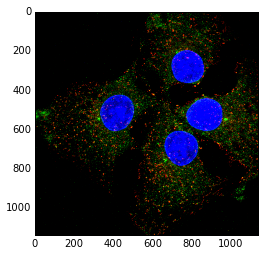

In [23]:
img = io.imread('nuclei.png')        # import image
plt.imshow(img)                      # create image object and visualise
print 'image 1'
np.savetxt('nuclei.txt', img[:,:,0])   # save to txt file; sliced array as we only want one chanel

Now you can inspect the text file with name nuclei and check for yourself that this is a table with numbers.

On the other hand, you can take a collection of numbers that are ordered in an array and isualise them as an image by considering each number a pixel value. Here we do this by generating an array with random entries, saving it as a text file, importing it as a NumPy array and then visualising it as an image:

img2 is an array of numbers: 
[[ 89  97  66 142 210  43 227 234  91 147]
 [139 232 224  91 125 248 194 191 166   1]
 [  0 129 113 251 250 100 231 132 199   8]
 [ 22  87 175  70 245 152  32 178  96  27]
 [  7  73  58  96 246 121 202 213 225 112]
 [247 232 207  23 145 114 126 121 244  49]
 [201  26 193 185 203 113 183 102  74 113]
 [202  36 118 252 184  68 241 100  27 168]
 [196  48 192  21  62 168 105  23 157 215]
 [ 86  79 132 221  11  18 161  21 175  86]]
<type 'numpy.ndarray'>
uint8
image 2


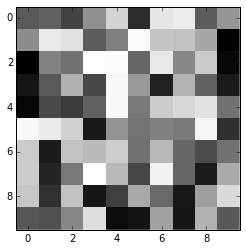

In [24]:
img2=np.random.randint(0,255,[10,10]) # create random array of integers between 0 and 255 (integers with bit-depth 8 (we will explain this later on))
print 'img2 is an array of numbers: \n', img2
np.savetxt('randimg.txt', img2) # save as text file

dataimg = np.loadtxt("randimg.txt", dtype='uint8')   # load txt file and a numpy array with data type uint8
print type(dataimg) # check imported data is a numpy array
print dataimg.dtype # check the data type
plt.imshow(dataimg, interpolation="none", cmap='gray') # visualise as image, interpolation=none shows actual pixels, cmap is the choice of color map
print 'image 2'
plt.show()

### 1.2 Variable type, bit-depth and data type

In the discussion above, we have been metioning in passing concepts such as _data type, uint8, etc._ Before we get to understand them, we need to remind ourselves abour _variable types_ and _bit_depth_.

#### Variable type

Python's and Numpy's standard data types include:

In [20]:
# numeric (int, float, complex, boolean), 
b1 = 5.1 # float
b2 = 5 # int
b3 = 1<2 # boolean
print type(b1)
print type(b2)
print type(b3)

# lists 
c = ['karin', 'sasaki', 345.453]
print type(c)

# strings 
print type(c[0])

# tuples
d = (123, 'john')
print type(d)

# dictionaries
e = {'name': 'marcie','code':63214, 'dept': 'mathematics'}
print type(e)

# Numpy array
f = np.array([1,2,3,4,5])
print type(f)

# note this is different form the list
h = [1,2,3,4,5]
print type(h)

<type 'float'>
<type 'int'>
<type 'bool'>
<type 'list'>
<type 'str'>
<type 'tuple'>
<type 'dict'>
<type 'numpy.ndarray'>
<type 'list'>


In particular, Numpy arrays are numerical in nature - and by extension, so are images that are manipulated using the Numpy module. Data is alocated a 

#### Bit-depth

Computers code information with binary numbers.

Decimal (denary) numbers are values represented in the denary numerical system, which represents numeric values using ten symbols: 0,...,9. In the same spirit, a binary number is a value represented in the binary numerical system, which represents numeric values using two symbols, 1 and 0.

We are most used to thinking in terms of base 10 values, so we can ask the following question: how many different decimal values can be represented in binary?

Well, if you only have one position, then you can only represent 2 decimal numbers, or 2^1, namely 0 and 1.

If you have 2 positions, then you have the following possible combinations of 1s and 0s:

| binary | decimal |
|:------:|:-------:|
| 00     | 0       |
| 01     | 1       |
| 10     | 2       |
| 11     | 3       |

So you can represent 4 numbers, or 2^2.

If you have three positions, you can represent 2^3 = 8 decimal numbers.

| binary | decimal |
|:------:|:-------:|
| 000    | 0       |
| 001    | 1       |
| 010    | 2       |
| 011    | 3       |
| 100    | 4       |
| 101    | 5       |
| 110    | 6       |
| 111    | 7       |

If you have n positions, then you can represent 2^n decimal numbers.

A _bit_ is the smallest unit of data in a computer and it has a single binary value, either 0 or 1. _Bytes_ are multiples of bits. So, if a number in a computer is stored in an 8-bit byte, then, as discussed above, that number will be one of 2^8 (+1, including 0) = 256 values.

The number of bits in a byte is what is refered to as the _depth_. Note that increasing bit-depth comes hand in hand with increasing memory use. 


#### Data type
The data type is the variable type and the bit-depth. The most relevant for images are variables with data type _uint8_ (unsigned integerg with bit-depth of 8). To find out this information, use the command `dtype`.

### 1.3 Grayness resolution

Recall we mentioned that each pixel in an image has 'intensity' somewhere between black and white and that this is represented as a number. But exactly how many levels of grays are there? The answer depends on the _data type_ of choice. 

Now that we understand that: 

1. images are arrays of numbers that represent pixel intensity,

2. that those intensities (the grayscale) range from black to white and 

3. that such objects are stored in the computer memory at a specific depth

we can apply the concept of bit depth to images.

1-bit means that the grayscale of the image has 2^1 = 2 steps, so each pixel can be one of only two colors, black (0) or white (1).

8-bit means that the gray-scale of the image has 2^8 = 256 steps: in other words, the grayness between black and white is divided into 256 steps. Image 2 above shows an image with bit-depth of 8. You can compare the gray level with the numbers of the array.

In the same way 16-bit translates to 216 = 65536 steps, hence for 16-bit images one can assign gray-level to pixels in a much more precise way; in other words "grayness resolution" is higher.

Without getting into the technicalities of how microscope images are generated, the sensor of the microscope takes in the light and converts it into electrical signals, which is then converted into voltage and then finally into pixel values, for the corresponding position within the image. The signal intensity is continuous data (e.g. recall that there are an infinitelly many (decimal) numbers between 0 and 1). However, the digitalisation process makes the data discrete (as is represented with integer values), so we loose the ability to encode infinite steps and, for example, 0.45 might be converted to 0, whilst 0.56 to 1. Larger bit-depth enables more detailed conversion (higher resolution) of signal intensity (continuous value) to pixel values (discrete).

It is important to keep this understading in mind when choosing a bit depth. This choice is ultimately a balance amongst the imaging conditions and the type of analysis required. 

#### RGB format

Let's discuss briefly color images in RGB format.

Every color in a digital image is made up of some combination of the three primary colors of light - red, green and blue. If your data type is 1-bit, then the most you could create would be eight different colors, including white if you mixed all three together and black if all of them are absent.

```
RGB
001 - red
010 - green
100 - blue
011 - yellow
101 - magneta
110 - cyan
111 - white
000 - black
```

To achieve all the beautiful colors that you can see in most images now a days, it is necessary to use multiple shades of red, green and blue and then indicate which shade of red, green and blue to include. By choosing a bit depth bigger than 1, you effectively get 2^bit shades of each color,  giving you a total of (2^bit)^3 different colors. 

A single RGB image thus has three different channels. In other words, three layers, one for each color, are overlaid in a single image. In general, each channel (layer) has a bit depth of 8-bit. So a single RGB image is 24-bit image. 

#### Color maps and look up tables (LUT) (or how the matrix of numbers is converted to an image)

For the moment, let's stick to 8-bit depth format. A _look up table_ is a reference table for the color of each pixel - the pixel value is read, is compared with the list of indices in the table and the corresponding combination of shade values for each of R, G and B is allocated. Different color maps have different combinations of RBG for each index. Let's see what different color maps look like:

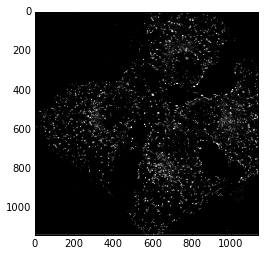

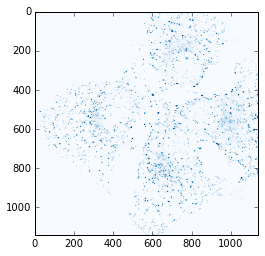

In [45]:
# visualise with different color map
plt.imshow(img[:,:,0],interpolation='none',cmap='gray')  # the color map is gray      
plt.show()
plt.imshow(img[:,:,0],interpolation='none',cmap='Blues') # the color map is blues
plt.show()

Now, let's have a look at the actual look up tables:

In [46]:
from matplotlib import cm  # import appropiate module

# define function that prints the LUT
def printLUT(colorMap):
    """
    Description: Prints the LUT
    Requirements: cm from matplotlib
    Input argument(s): colorMap=cm.mapName
    Example: printLUT(cm.gray)
    """
    for i in range(256):
        print i, colorMap(i)
        
# print the LUTs   
print 'gray'
printLUT(cm.gray)    
print '\n blues'
printLUT(cm.Blues)        

gray
0 (0.0, 0.0, 0.0, 1.0)
1 (0.0039215686274509803, 0.0039215686274509803, 0.0039215686274509803, 1.0)
2 (0.0078431372549019607, 0.0078431372549019607, 0.0078431372549019607, 1.0)
3 (0.011764705882352941, 0.011764705882352941, 0.011764705882352941, 1.0)
4 (0.015686274509803921, 0.015686274509803921, 0.015686274509803921, 1.0)
5 (0.019607843137254902, 0.019607843137254902, 0.019607843137254902, 1.0)
6 (0.023529411764705882, 0.023529411764705882, 0.023529411764705882, 1.0)
7 (0.027450980392156862, 0.027450980392156862, 0.027450980392156862, 1.0)
8 (0.031372549019607843, 0.031372549019607843, 0.031372549019607843, 1.0)
9 (0.035294117647058823, 0.035294117647058823, 0.035294117647058823, 1.0)
10 (0.039215686274509803, 0.039215686274509803, 0.039215686274509803, 1.0)
11 (0.043137254901960784, 0.043137254901960784, 0.043137254901960784, 1.0)
12 (0.047058823529411764, 0.047058823529411764, 0.047058823529411764, 1.0)
13 (0.050980392156862744, 0.050980392156862744, 0.050980392156862744, 1.0)


Notice that for the gray colormap, the values of RGB are the same for each index, but this is not the case for the blues color map.

You can change the default color map with the comands below:

In [47]:
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'gray'

### 1.3 Image arithmetic and unexpected errors

As we now know, a digital image is a matrix of integers so you can do array arithmetic on the as normal.

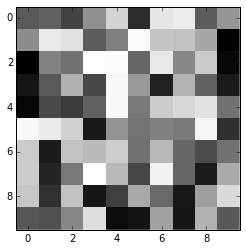

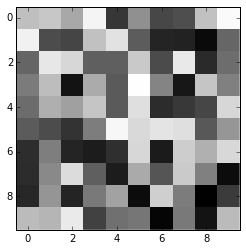

uint8


Given the data type, note that values are calculated modulo 256...
[[ 89  97  66 142 210  43 227 234  91 147]
 [139 232 224  91 125 248 194 191 166   1]
 [  0 129 113 251 250 100 231 132 199   8]
 [ 22  87 175  70 245 152  32 178  96  27]
 [  7  73  58  96 246 121 202 213 225 112]
 [247 232 207  23 145 114 126 121 244  49]
 [201  26 193 185 203 113 183 102  74 113]
 [202  36 118 252 184  68 241 100  27 168]
 [196  48 192  21  62 168 105  23 157 215]
 [ 86  79 132 221  11  18 161  21 175  86]]


[[189 197 166 242  54 143  71  78 191 247]
 [239  76  68 191 225  92  38  35  10 101]
 [100 229 213  95  94 200  75 232  43 108]
 [122 187  19 170  89 252 132  22 196 127]
 [107 173 158 196  90 221  46  57  69 212]
 [ 91  76  51 123 245 214 226 221  88 149]
 [ 45 126  37  29  47 213  27 202 174 213]
 [ 46 136 218  96  28 168  85 200 127  12]
 [ 40 148  36 121 162  12 205 123   1  59]
 [186 179 232  65 111 118   5 121  19 186]]


 ... and floats get rounded
[[29 32 22 47 70 14 75 78 30 49

In [48]:
# show original
data_plot = plt.imshow(dataimg,cmap="gray", interpolation='None')
plt.show()

# add 100 to each pixel value and show resulting image
data_plot = plt.imshow(dataimg+100,cmap="gray", interpolation='None')
plt.show()

print dataimg.dtype
print '\n'

print 'Given the data type, note that values are calculated modulo 256...'
print dataimg
print '\n'
print dataimg + 100
print '\n'

print ' ... and floats get rounded'
print dataimg / 3

This kind of arithmetics, which 'loops' around is called _modulo arithmetic_. It can be a source of unexpected errors, but once you grasp it, you should have no problem recognising them.

Example of what can go wrong: when you subtract a background, but you don't have an appropriate threshold, you might get negative numbers, but in the machine, it might loop around and something that was supposed to be black becomes white.

## 2. Warm up pipeline

We will be working with an image that shows RAT2 rat fibroblasts. The aim of the labeling is to measure colocalization of motor proteins and adaptor protein. 

**Green -** p150glued (motor protein; the biggest subunit of dynactin promotes the initiation of dynein-driven cargo motility from the microtubule plus-end); 

**Red -** AP2 beta subunit (Adaptor protein complexes function in protein transport via transport vesicles in different membrane traffic pathways)

**Blue -** DAPI (nucleus)

#### Import and explore image

In [67]:
# import multi-color image
img = io.imread('nuclei.png') # use the documentation to understand how to use this function. Google python skimage io imread doc

In [68]:
# variable type
print type(img)

# data type
print img.dtype    

# print array shape/dimensions
print img.shape  

<type 'numpy.ndarray'>
uint8
(1140, 1140, 4)


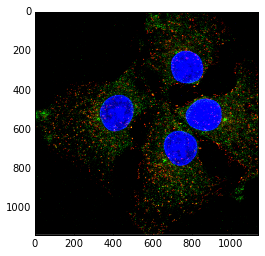

In [69]:
# visualise
plt.imshow(img, interpolation='none',cmap='gray')

#### --˜˜----˜˜----˜˜----˜˜----˜˜--Side note --˜˜----˜˜----˜˜----˜˜----˜˜--

I don't want to type 
```
plt.imshow(img, interpolation='none',cmap='gray')
```
every time I want to visualise and image, so I am going to make a function.

A function is a block of organized, reusable code that is used to perform a single, action. Functions provide better modularity for your program and facilitate reusing code becasue instead of copy paste, you can just call the function. If you need to familiarise yourself with functions and modules in python, we refer you to the accompanying tutorial.

Remember that the syntax for definitg functions is as follows:

def functionname( parameters ):

    """function_docstring"""
    function_suite
    return [expression]
  

In [70]:
def myplt(img):
    """This function displays the input image with interpolation='none' and cmap='gray'. """
    plt.imshow(img,interpolation='none',cmap='gray')
    plt.show()

To use, just type:

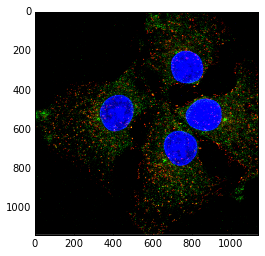

In [71]:
myplt(img)

To get help on this function, you can run the command help(myplt):

In [72]:
help(myplt)

Help on function myplt in module __main__:

myplt(img)
    This function displays the input image with interpolation='none' and cmap='gray'.



#### --˜˜----˜˜----˜˜----˜˜----˜˜--Side note --˜˜----˜˜----˜˜----˜˜----˜˜--

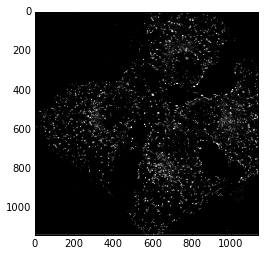

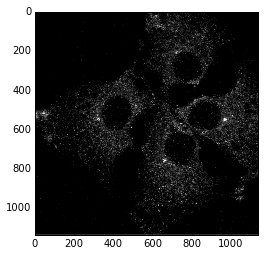

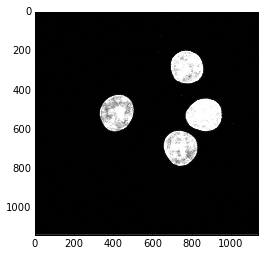

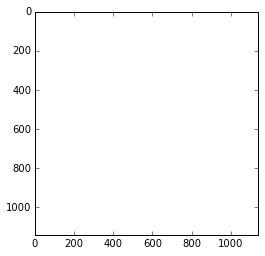

In [73]:
# look at each slice of the image (since it has 4 dimensions and we know it is RGB)
for i in range(img.shape[-1]): 
    myplt(img[:,:,i])

(The last slice is to define for opacity.)
Now we know what each slice is:

0 is AP2

1 is p150glued

2 are the nuclei

3 is for opacity

So we can allocate each of the slices to a variable with an intuitive name.

In [74]:
# slice array to get each channel
adaptor = img[:,:,0]
motor = img[:,:,1]
nuclei = img[:,:,2]

A simple way to measure co-localisation is to check how often pixels that are above average intensity in red are also above average intensity in green.

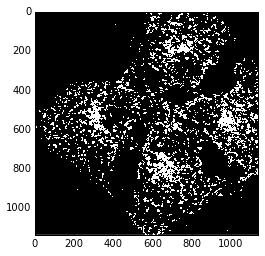

In [75]:
# get all pixels in red that are above average and assign them to 1. The rest should be assigned to 0
mean_adaptor = np.mean(adaptor)   

adaptor[adaptor<2*mean_adaptor] = 0
adaptor[adaptor>=2*mean_adaptor] = 1
        
myplt(adaptor)

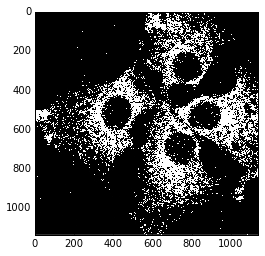

In [76]:
# get all pixels in green that are above average and assign them to 1. The rest should be assigned to 0.
mean_motor = np.mean(motor)   

motor[motor<2*mean_motor] = 0
motor[motor>=2*mean_motor] = 1
        
myplt(motor)

As you will see below, to test colocalisation, we will check wich pixels have the same value, namely 1. We will do this using the logical operator ==. However, this will also test whether any other values are the same, namely 0 in this case. So we need to make the 0 values of one of the images a differnt value, e.g. 2 and 3.

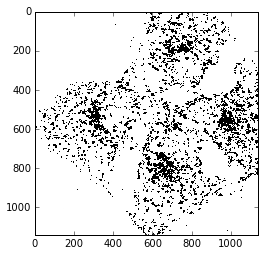

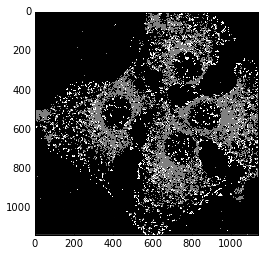

In [77]:
# change 0 values
img.shape    
for i in range(img.shape[0]): 
    for j in range(img.shape[1]): 
        if adaptor[i,j] == 0:
            adaptor[i,j] = 3
        elif motor[i,j]==0:
            motor[i,j] = 2
            
# visualise            
myplt(adaptor)
myplt(motor)                        

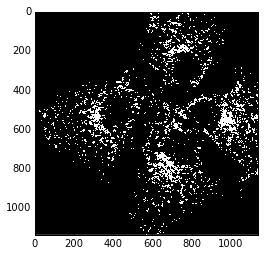

In [79]:
# test if colocalised -> make a new variable that contains 1 at co-localisation pixels and 0 elsewhere.    
colocalised = adaptor == motor

# visualise co-localisation
myplt(colocalised) 

Now we can make measurements and store them:

In [80]:
# store results  in a dictionary      
results = {'protein':[], 'intensity':[], 'number':[]}        
results['protein'] = ['AP2', 'p150glued']
results['intensity'] = [mean_adaptor, mean_motor]
results['number'] = [sum(sum(adaptor)), sum(sum(motor)), sum(sum(colocalised))]

print results

{'protein': ['AP2', 'p150glued'], 'intensity': [8.3106078793474918, 9.8909087411511241], 'number': [154370, 140631, 95877]}


In [81]:
# save image to tiff file

    # Get filehandling function
from tifffile import imsave
    
    # save image
imsave("ext_nuc_AP2_beta_subunit.tif",adaptor,bigtiff=True) 

In [82]:
# save quantitative data to json file
import json
json.dump(results, open("results.txt", 'w'))

## 3. Outlook

This short pipeline has used almost no image processing methods. The main tutorial will take you through some of the basics of image processing but before you start that, we strongly recommend that you understand the topic of _filtering_. An excellent reference is chapter 1.3 of the freely available [Basics of Image Processing and Analysis book](http://cmci.embl.de/documents/ijcourses). Here we give you a very brie

#### Introduction to morphological processing
 
Images may contain numerous imperfections. Morphological image processing is a process that pursues the goal of removing these imperfections, by using a collection of operations that account for the form, shape or structure (morphology) of features in the image. 

Morphological techniques probe an image with a small shape or template called a structuring element (se). An se is a binary image, i.e. an array of pixels, with each entry having a value of zero or one. The array dimensions specify the size of the se, e.g. a 3x3 array below, and the pattern of ones and zeros specifies the shape of the se, e.g. a square or cross, as below;

```
 1 1 1         0 1 0
 1 1 1         1 1 1
 1 1 1         0 1 0
```

The 'origin' of the se is one of its pixels, usually the (middle) entry; entry (2,2) in the two examples above.

Morphological processing consists of 
1. positioning the se at all possible locations in the image, 
2. comparing it with the corresponding image pixels, 
3. calculating a value (e.g. the average, median, etc) taking into account only the pixels of the image that have a corresponding 1 in the se, and 
4. allocating that value to the pixel in the image that corresponds to the origin of the se.

This procedure generates another array with the same dimensions as the input image, but, possibly, with different values for each of its entries. 
 
For example, allocating the average of all the pixel values in the se is called applying a mean filter. Another example is, with a binary input image, to test whether the element "fits" within the neighbourhood; that is, if for each of the pixels of the se that are set to 1, the corresponding image pixels are also 1. This process is called doing an erotion. A similar  concept is dilation, where you would test if the se ''hits''.

#### References

[Basics of Image Processing and Analysis - Kota Miura](http://cmci.embl.de/documents/ijcourses)

[tutorialspoint.com](http://tutorialspoint.com)

In [ ]:
def